In [ ]:
install.packages('tseries')
install.packages('forecast')
install.packages('readxl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
##### Memanggil library #####
library(tseries)
library(ggplot2)
library(forecast)
library(readxl)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
##### Memanggil Data ######
data = read_excel('Data Laprak UTS Metode Peramalan.xlsx')

In [ ]:
data

date,humidity
<dttm>,<dbl>
2013-01-01,84.50000
2013-01-02,92.00000
2013-01-03,87.00000
2013-01-04,71.33333
2013-01-05,86.83333
2013-01-06,82.80000
2013-01-07,78.60000
2013-01-08,63.71429
2013-01-09,51.25000


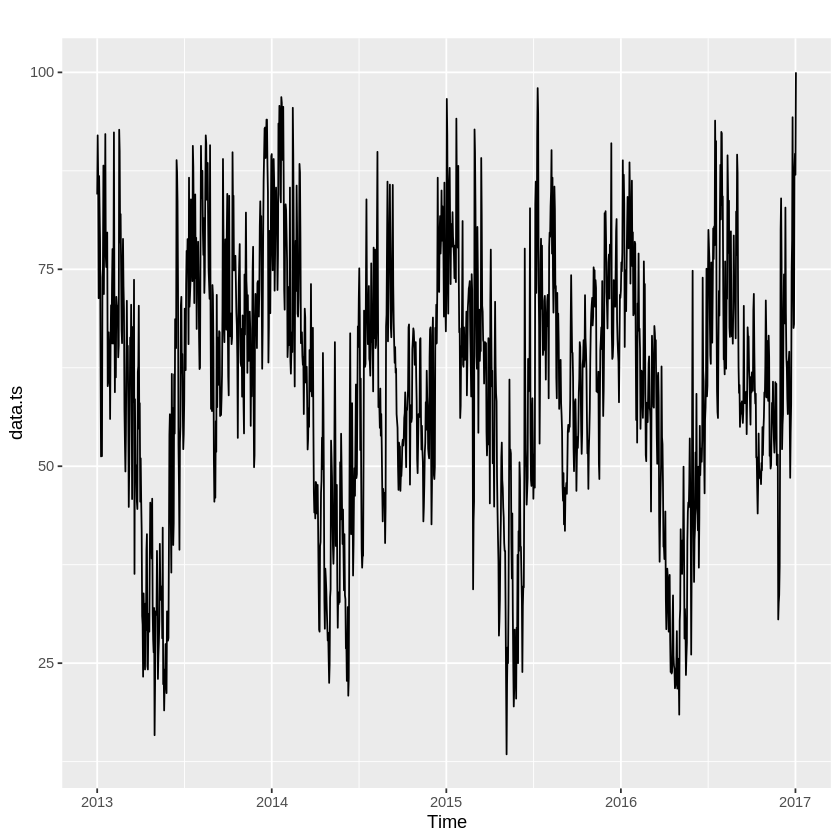

In [ ]:
##### Membuat Data Time Series dan Membuat Plot Data ####
data.ts = ts(data['humidity'], start = c(2013, 1, 1), frequency = 365)
autoplot(data.ts)

In [ ]:
#ADF Test
adf.test(data.ts)


	Augmented Dickey-Fuller Test

data:  data.ts
Dickey-Fuller = -3.7785, Lag order = 11, p-value = 0.02006
alternative hypothesis: stationary


Dapat dilihat bahwa data memiliki seasonality dan tidak memiliki trend. Karena p-value dari ADF test kurang dari 0.05, maka data bersifat stationer.

# Simple Exponential Smoothing

In [ ]:
SES<-ses(data.ts, alpha = 0.2, h=5)
SES

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
5.005479       83.18102 71.19724 95.16479 64.85342 101.5086
5.008219       83.18102 70.95992 95.40212 64.49046 101.8716
5.010959       83.18102 70.72711 95.63492 64.13441 102.2276
5.013699       83.18102 70.49858 95.86345 63.78491 102.5771
5.016438       83.18102 70.27410 96.08794 63.44159 102.9204

In [ ]:
accuracy(SES)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.009013503,9.34459,7.273595,-2.706439,13.28111,0.5550448,0.5364383


In [ ]:
nilaiAlpha = seq(0.01,0.99, by = 0.01)
nilaiAlpha

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
[16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30
[31] 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45
[46] 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60
[61] 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75
[76] 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90
[91] 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99

In [ ]:
RMSE = NA
for (i in seq_along(nilaiAlpha)){
  SES <- ses(data.ts, alpha = nilaiAlpha[i], h = 3)
  RMSE[i] = accuracy(SES)[,2]
}

In [ ]:
Tabel.RMSE = data.frame(nilaiAlpha,RMSE)
head(Tabel.RMSE)

,nilaiAlpha,RMSE
,<dbl>,<dbl>
1,0.01,15.89677
2,0.02,14.51654
3,0.03,13.36441
4,0.04,12.49687
5,0.05,11.85446
6,0.06,11.37399


In [ ]:
Min.RMSE = Tabel.RMSE[which.min(Tabel.RMSE$RMSE),]

Min.RMSE

,nilaiAlpha,RMSE
,<dbl>,<dbl>
83,0.83,8.175322


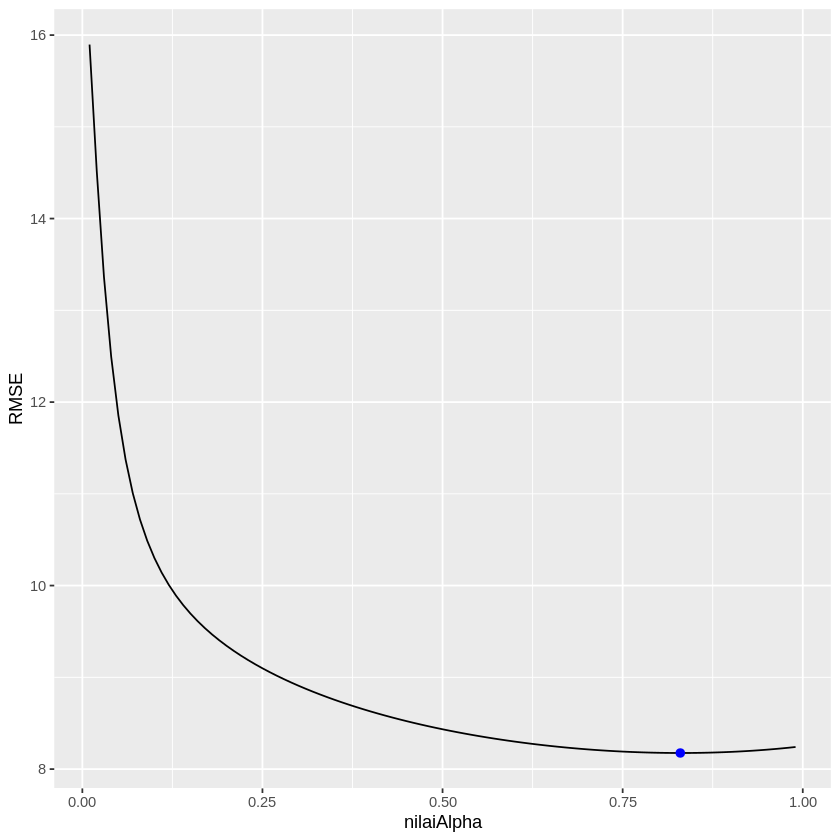

In [ ]:
ggplot(Tabel.RMSE, aes(nilaiAlpha, RMSE)) +
  geom_line() +
  geom_point(data = Min.RMSE, aes(nilaiAlpha, RMSE), size =
2, color = "blue")

In [ ]:
SESOptimum <- ses(data.ts, alpha = 0.83, h = 5)
SESOptimum

          Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017.0055        97.8418 87.35753 108.3261 81.80749 113.8761
2017.0082        97.8418 84.21669 111.4669 77.00399 118.6796
2017.0110        97.8418 81.67493 114.0087 73.11671 122.5669
2017.0137        97.8418 79.48175 116.2019 69.76253 125.9211
2017.0164        97.8418 77.52395 118.1597 66.76832 128.9153

In [ ]:
accuracy(SESOptimum)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.01007002,8.175322,6.120915,-1.250009,10.80416,0.4670843,0.03117316


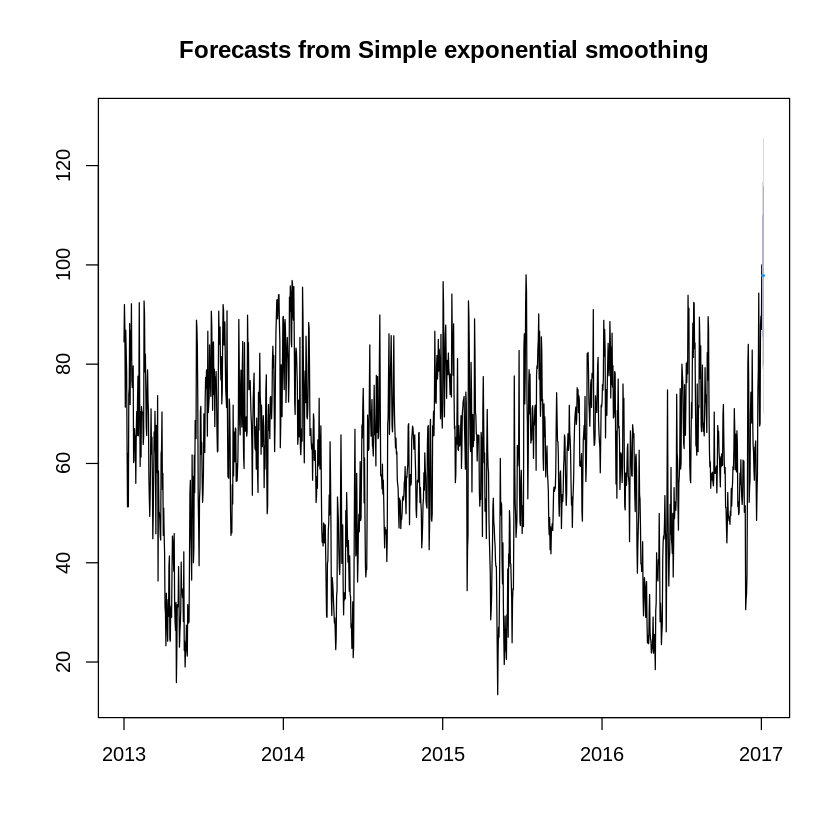

In [ ]:
plot(SESOptimum)

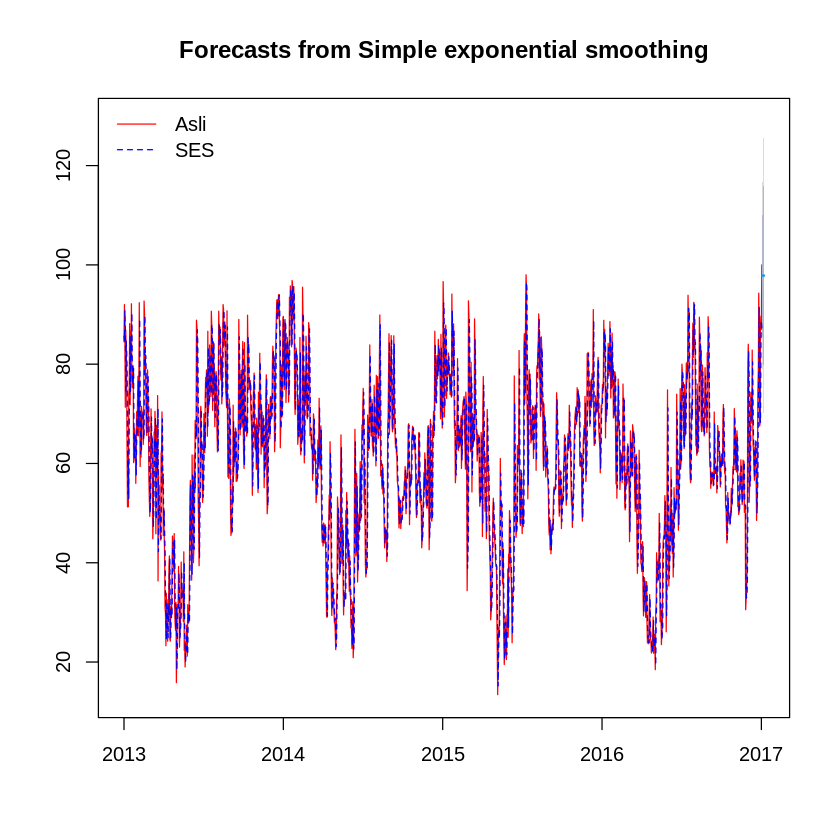

In [ ]:
#membuat plot
plot(SESOptimum,col="red",lwd=1.0)
lines(SESOptimum$fitted,col="blue",lty=2,lwd=1.0)
legend("topleft", c("Asli", "SES"),
bty="n", lwd=c(1.0,1.0),lty=c(1,2), col=c("red",
"blue"))

# Tsa Aditif

In [ ]:
data_ts=ts(data[,2], frequency = 365)

In [ ]:
head(data_ts)

humidity
84.50000
92.00000
87.00000
71.33333
86.83333
82.80000


In [ ]:
TripleSESAditif<- HoltWinters(data_ts, seasonal = c("additive"))
TripleSESAditif

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data_ts, seasonal = c("additive"))

Smoothing parameters:
 alpha: 0.7175219
 beta : 0
 gamma: 1

Coefficients:
             [,1]
a     74.38918629
b     -0.01169702
s1    14.15901307
s2    15.45748767
s3    20.50585538
s4    19.82957324
s5    16.05945187
s6    11.95811447
s7     7.97090588
s8    16.12805778
s9    18.10385104
s10   14.97352565
s11   12.24880830
s12   13.12237557
s13   20.82849723
s14   21.89403182
s15   25.55522124
s16   27.84574217
s17   26.32736788
s18   19.28270076
s19   21.97123325
s20   34.61237803
s21   25.71290393
s22   27.63503276
s23   23.52646106
s24   25.78267464
s25   10.19029825
s26    5.47108979
s27   11.25957786
s28   15.00409812
s29   16.07755788
s30   13.20504339
s31    9.69768638
s32    8.98919069
s33    1.72571902
s34    6.50227512
s35    1.85208632
s36    4.84814032
s37    8.90012525
s38    4.53595640
s39   -0.52695236
s40   -2.99840713
s41    1.6679

In [ ]:
prediksiAditif=forecast(TripleSESAditif,h=5)
prediksiAditif

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
5.005479       88.53650 76.11675 100.9563 69.54212 107.5309
5.008219       89.82328 74.53720 105.1094 66.44524 113.2013
5.010959       94.85995 77.16594 112.5540 67.79929 121.9206
5.013699       94.17197 74.36056 113.9834 63.87303 124.4709
5.016438       90.39015 68.66676 112.1135 57.16709 123.6132

In [ ]:
accuracy(prediksiAditif)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.02755419,9.686808,6.965048,-0.9436029,12.33826,0.5314997,0.1561122


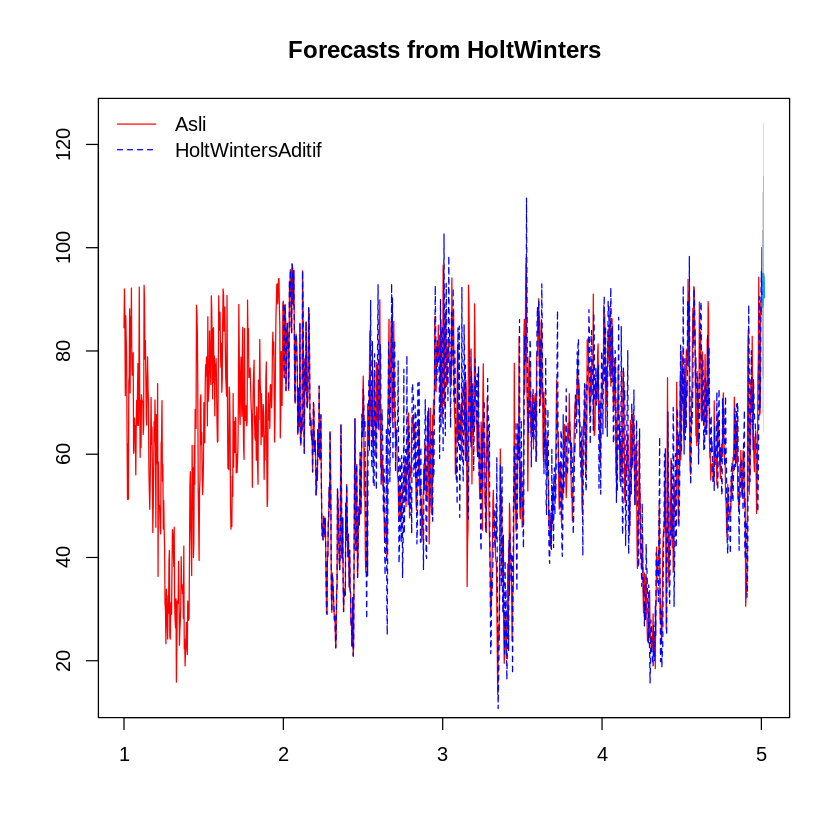

In [ ]:
#membuat plot
plot(prediksiAditif,col="red",lwd=1.0)
lines(prediksiAditif$fitted,col="blue",lty=2,lwd=1.0)
legend("topleft", c("Asli", "HoltWintersAditif"),
bty="n", lwd=c(1.0,1.0),lty=c(1,2), col=c("red",
"blue"))

# Multiplikatif

In [ ]:
#langsung ke alpha beta gamma terbaik
TripleESMultiplikatif<-HoltWinters(data_ts,seasonal = c("multiplicative"))
TripleESMultiplikatif

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = data_ts, seasonal = c("multiplicative"))

Smoothing parameters:
 alpha: 0.7544928
 beta : 0
 gamma: 1

Coefficients:
            [,1]
a    73.52736487
b    -0.01169702
s1    1.18885477
s2    1.22801902
s3    1.30318522
s4    1.30359333
s5    1.21364093
s6    1.17066666
s7    1.12281524
s8    1.25381004
s9    1.28093436
s10   1.22980395
s11   1.17536620
s12   1.19407680
s13   1.31896452
s14   1.33982636
s15   1.39753041
s16   1.43132029
s17   1.39059483
s18   1.28886818
s19   1.33418316
s20   1.53986806
s21   1.38935248
s22   1.41944365
s23   1.36057436
s24   1.39067431
s25   1.14277431
s26   1.07865122
s27   1.17722653
s28   1.22403400
s29   1.24998685
s30   1.20544156
s31   1.14252069
s32   1.11110845
s33   1.00190138
s34   1.08634832
s35   1.02391569
s36   1.06914920
s37   1.13330036
s38   1.05128703
s39   0.98051741
s40   0.95177292
s41   1.02946513
s42   0.99608706
s43   1.23

In [ ]:
prediksiMultiplikatif=forecast(TripleESMultiplikatif,h=5)
prediksiMultiplikatif

         Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
5.005479       87.39945 75.18554  99.61337 68.71988 106.0790
5.008219       90.26427 74.77915 105.74940 66.58182 113.9467
5.010959       95.77405 77.14995 114.39814 67.29095 124.2571
5.013699       95.78879 75.00524 116.57234 64.00309 127.5745
5.016438       89.16484 67.53422 110.79546 56.08366 122.2460

In [ ]:
accuracy(prediksiMultiplikatif)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.3696681,9.533394,6.695602,-1.67956,11.75374,0.5109384,0.1308006


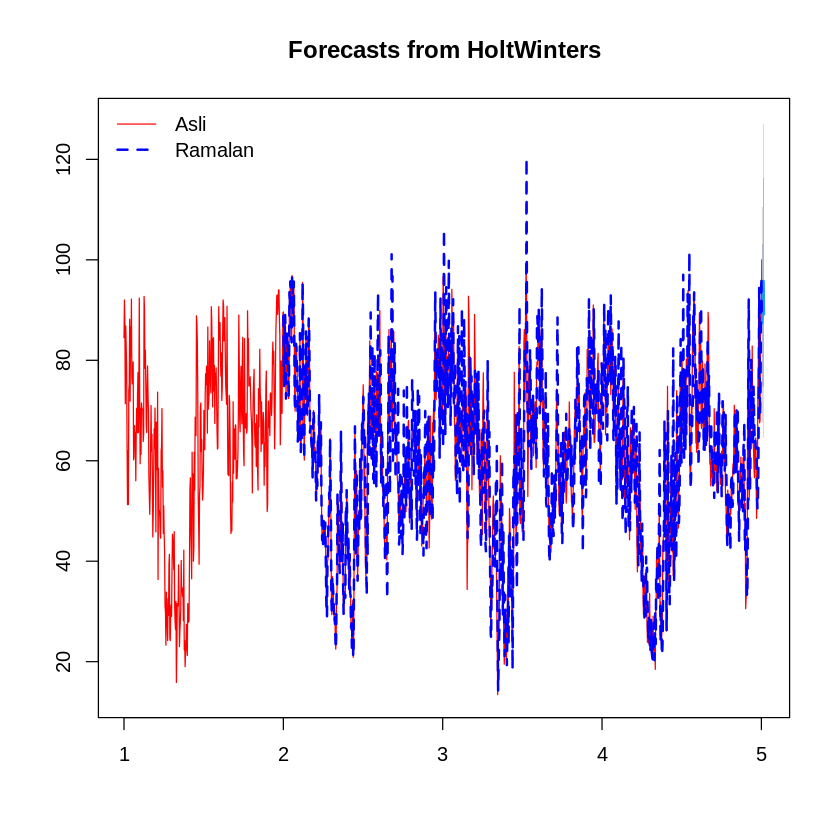

In [ ]:
plot(prediksiMultiplikatif,col="red",lwd=1.0)
lines(prediksiMultiplikatif$fitted,col="blue",lty=2,lwd=2.0
)
legend("topleft", c("Asli", "Ramalan"), bty="n",

lwd=c(1.0,2.0),lty=c(1,2), col=c("red", "blue"))